# Sample File Generation

In [1]:
# load dataset - load google drive

from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
%cd "./drive/My Drive/tsclustering"

/content/drive/My Drive/tsclustering


In [3]:
%cd "./generated_data_0301/"

/content/drive/My Drive/tsclustering/generated_data_0301


In [0]:
# get file names

import os 
import pandas as pd
import glob


files  = glob.glob('*.csv')

In [5]:
import pandas as pd

files = pd.Series(sorted(files))
print(files)

0              arch_acf-high.csv
1               arch_acf-low.csv
2               arch_r2-high.csv
3                arch_r2-low.csv
4             curvature-high.csv
5              curvature-low.csv
6            diff1_acf1-high.csv
7             diff1_acf1-low.csv
8           diff1_acf10-high.csv
9            diff1_acf10-low.csv
10         diff1x_pacf5-high.csv
11          diff1x_pacf5-low.csv
12          diff2_acf10-high.csv
13           diff2_acf10-low.csv
14          diff2_pacf5-high.csv
15           diff2_pacf5-low.csv
16               e_acf1-high.csv
17                e_acf1-low.csv
18              e_acf10-high.csv
19               e_acf10-low.csv
20              entropy-high.csv
21               entropy-low.csv
22            frequency-high.csv
23             frequency-low.csv
24           frequency3-high.csv
25            frequency3-low.csv
26            garch_acf-high.csv
27             garch_acf-low.csv
28             garch_r2-high.csv
29              garch_r2-low.csv
          

In [0]:
for file in files: 
  
  fl = pd.read_csv(file)
  
  for index,column in enumerate(fl): 
    
    name        = file.replace('.csv', '-')+str(index+1).zfill(4)+'.csv'
    timeseries  = fl[column]
    timeseries.name = 'x'
    timeseries.to_csv('./samples/' + name)
    #print(fl[column])
  
  

## Sine Curves Geneartion

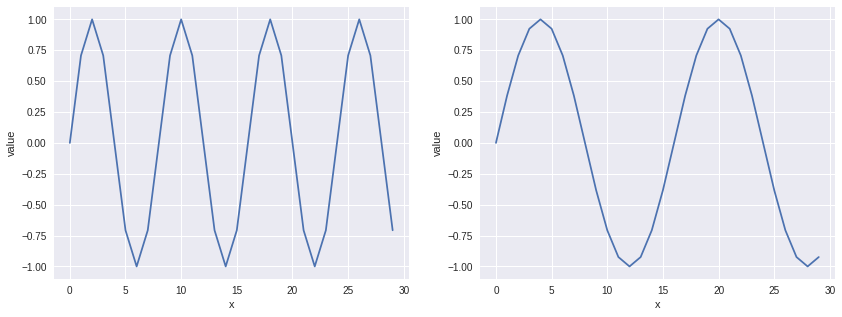

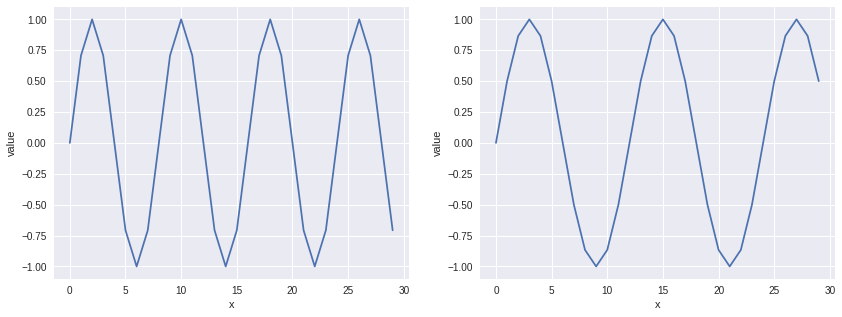

In [20]:
import matplotlib.pyplot as plt
import numpy as np


n_samples = 50

frequencies = [(2,1),(3,2)]


for frequency  in frequencies:

   plt.figure(figsize=(14,5))
  
   #low
   
   for index in range(n_samples):
  
     name = 'sine-'+ str(frequency[0]).zfill(2) + str(frequency[1]).zfill(2) +'-low-'+str(index+1).zfill(4)+ '.csv'
    
     Fs = 500.0 
     f = 8.0 * 1
     sample = 500
     sigma = 0 # 1/20
     x = np.arange(sample)
     y = np.sin(2 * np.pi * 1/f * x )  
      
     noise = np.random.normal(0,sigma,sample) 
     y += noise
    
     file = pd.DataFrame(y,columns=['x'])
      
     if index == n_samples -1 :
        plt.subplot(1,2,1)
        plt.plot(x[:30], y[:30])
        plt.xlabel('x')
        plt.ylabel('value')
      
     file.to_csv('./samples/' + name,header=False)
  
   #high
   
   for index in range(n_samples):
  
     name = 'sine-'+ str(frequency[0]).zfill(2) + str(frequency[1]).zfill(2) +'-high-'+str(index+1).zfill(4)+ '.csv'
    
     f2 = f * frequency[0]/frequency[1]
     x = np.arange(sample)
     y = np.sin(2 * np.pi * 1/f2 * x )  
      
     noise = np.random.normal(0,sigma,sample) 
     y += noise 
    
     file = pd.DataFrame(y,columns=['x'])
      
     #print(file)
      
     file.to_csv('./samples/' + name,header=False)
  
     if index == n_samples -1 :
        plt.subplot(1,2,2)
        plt.plot(x[:30], y[:30])
        plt.xlabel('x')
        plt.ylabel('value')
        plt.show()





## Saw Tooth Generation

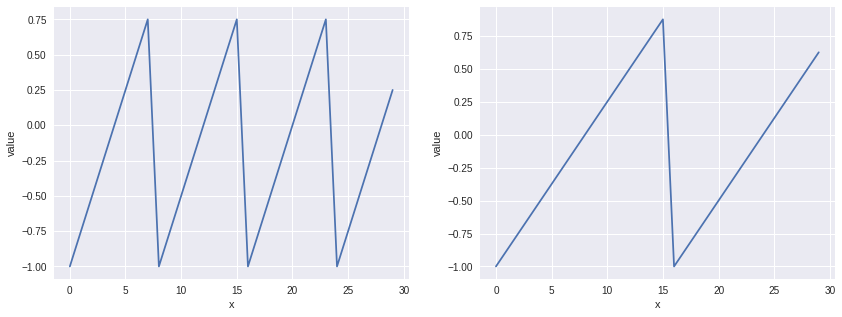

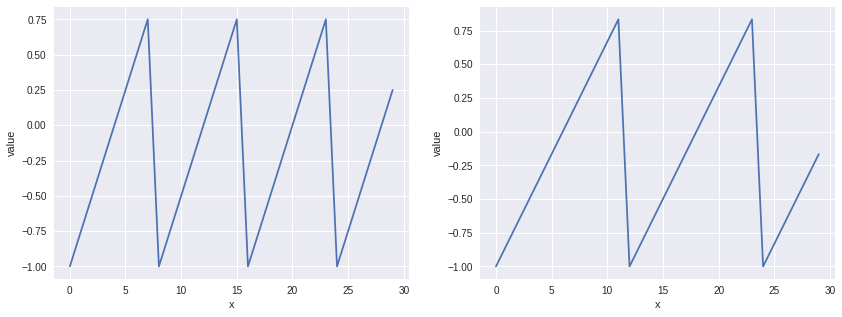

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
from scipy import signal



n_samples = 10

frequencies = [(2,1),(3,2)]

for frequency  in frequencies:
  
   plt.figure(figsize=(14,5))

   #low
   
   for index in range(n_samples):
  
     name = 'saw-'+ str(frequency[0]).zfill(2) + str(frequency[1]).zfill(2) +'-low-'+str(index+1).zfill(4)+ '.csv'
    
     Fs = 500.0 
     f =  8 * 1
     sigma =  0 #1.0/20.0
     sample = 500
     x = np.arange(sample)
     y = signal.sawtooth(2 * np.pi * 1/f * x)
    
     noise = np.random.normal(0,sigma,sample) 
     y += noise
      
     if index == n_samples -1 :
        plt.subplot(1,2,1)
        plt.plot(x[:30], y[:30])
        plt.xlabel('x')
        plt.ylabel('value')
        
     file = pd.DataFrame(y,columns=['x'])
      
     #print(file)
      
     file.to_csv('./samples/' + name,header=False)
  
   #high
   
   for index in range(n_samples):
  
     name = 'saw-'+ str(frequency[0]).zfill(2) + str(frequency[1]).zfill(2) +'-high-'+str(index+1).zfill(4)+ '.csv'
    
     Fs = 500.0 
     f2 = f * frequency[0]/frequency[1]
     sample = 500
     x = np.arange(sample)
     y = signal.sawtooth(2 * np.pi * 1/f2 * x)
      
     noise = np.random.normal(0,sigma,sample) 
     y += noise
    
     file = pd.DataFrame(y,columns=['x'])
      
     #print(file)
      
     file.to_csv('./samples/' + name,header=False)
  
     if index == n_samples -1 :
        plt.subplot(1,2,2)
        plt.plot(x[:30], y[:30])
        plt.xlabel('x')
        plt.ylabel('value')
        plt.show()
    
    

## Square Wave Generation

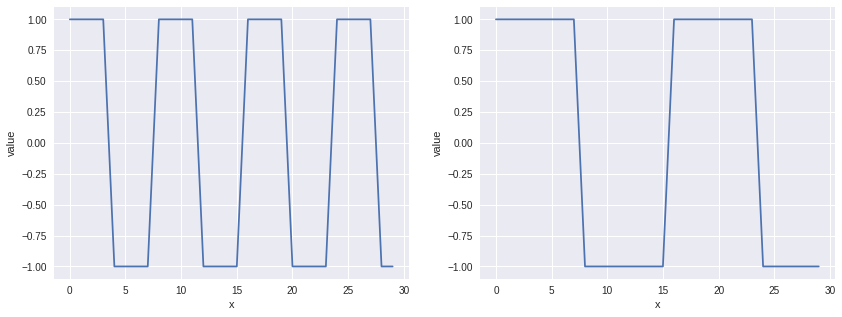

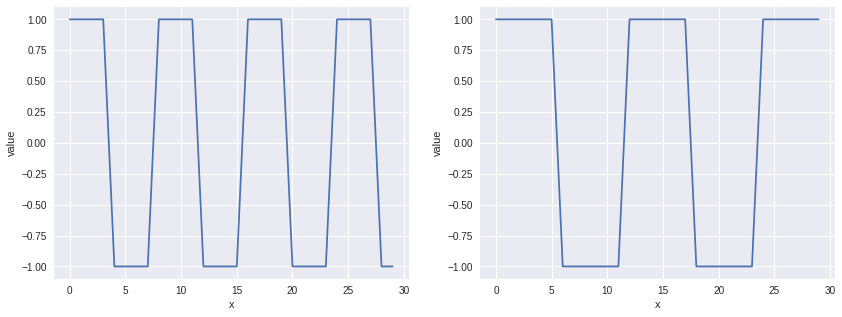

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
from scipy import signal



n_samples = 10

frequencies = [(2,1),(3,2)]

for frequency  in frequencies:
  
   plt.figure(figsize=(14,5))

   #low
   
   for index in range(n_samples):
  
     name = 'square-'+ str(frequency[0]).zfill(2) + str(frequency[1]).zfill(2) +'-low-'+str(index+1).zfill(4)+ '.csv'
    
     Fs = 500.0 
     f =  8
     sigma = 0 # 1.0/20.0
     sample = 500
     x = np.arange(sample)
     y = signal.square(2 * np.pi * 1/f * x)
     noise = np.random.normal(0,sigma,sample) 
     y += noise
      
     if index == n_samples -1 :
        plt.subplot(1,2,1)
        plt.plot(x[:30], y[:30])
        plt.xlabel('x')
        plt.ylabel('value')
        
     file = pd.DataFrame(y,columns=['x'])
      
     #print(file)
      
     file.to_csv('./samples/' + name,header=False)
  
   #high
   
   for index in range(n_samples):
  
     name = 'square-'+ str(frequency[0]).zfill(2) + str(frequency[1]).zfill(2) +'-high-'+str(index+1).zfill(4)+ '.csv'
    
     Fs = 500.0 
     f2 = f * frequency[0]/frequency[1]
     sample = 500
     x = np.arange(sample)
     y = signal.square(2 * np.pi * 1/f2 * x)
     noise = np.random.normal(0,sigma,sample) 
     y += noise
    
     file = pd.DataFrame(y,columns=['x'])
      
     #print(file)
      
     file.to_csv('./samples/' + name,header=False)
  
     if index == n_samples -1 :
        plt.subplot(1,2,2)
        plt.plot(x[:30], y[:30])
        plt.xlabel('x')
        plt.ylabel('value')
        plt.show()
    

## Triangle Wave Generation

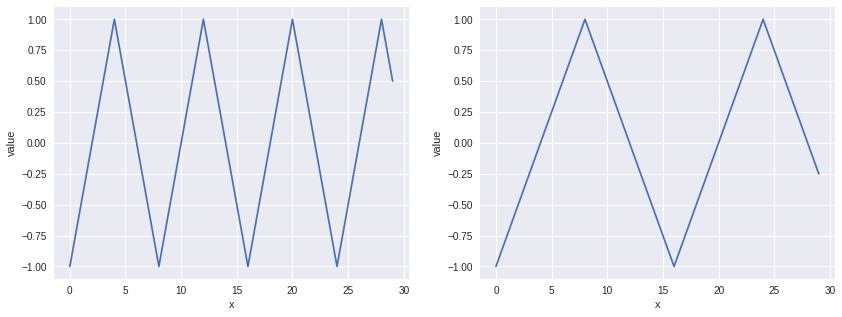

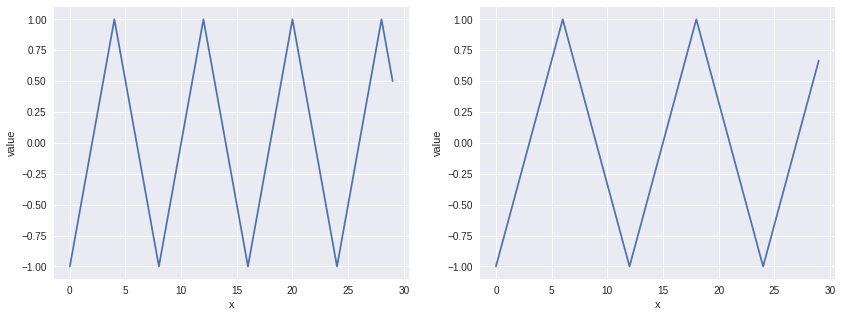

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
from scipy import signal



n_samples = 50

frequencies = [(2,1),(3,2)]

for frequency  in frequencies:
  
   plt.figure(figsize=(14,5))

   #low
   
   for index in range(n_samples):
  
     name = 'triangle-'+ str(frequency[0]).zfill(2) + str(frequency[1]).zfill(2) +'-low-'+str(index+1).zfill(4)+ '.csv'
    
     Fs = 500.0 
     f =  8 * 1
     sample = 500
     x = np.arange(sample)
     y = signal.sawtooth(2 * np.pi * 1/f * x, width=0.5)
      
     noise = np.random.normal(0,sigma,sample) 
     y += noise
      
     if index == n_samples -1 :
        plt.subplot(1,2,1)
        plt.plot(x[:30], y[:30])
        plt.xlabel('x')
        plt.ylabel('value')
        
     file = pd.DataFrame(y,columns=['x'])
      
     #print(file)
      
     file.to_csv('./samples/' + name,header=False)
  
   #high
   
   for index in range(n_samples):
  
     name = 'triangle-'+ str(frequency[0]).zfill(2) + str(frequency[1]).zfill(2) +'-high-'+str(index+1).zfill(4)+ '.csv'
    
     Fs = 500.0 
     f2 = f * frequency[0]/frequency[1]
     sample = 500
     x = np.arange(sample)
     y = signal.sawtooth(2 * np.pi * 1/f2 * x, width=0.5)
      
     noise = np.random.normal(0,sigma,sample) 
     y += noise 
    
     file = pd.DataFrame(y,columns=['x'])
      
     #print(file)
      
     file.to_csv('./samples/' + name,header=False)
  
     if index == n_samples -1 :
        plt.subplot(1,2,2)
        plt.plot(x[:30], y[:30])
        plt.xlabel('x')
        plt.ylabel('value')
        plt.show()
    

## SARIMA Wave Generation

## Data Sampling Gap

nums: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480]


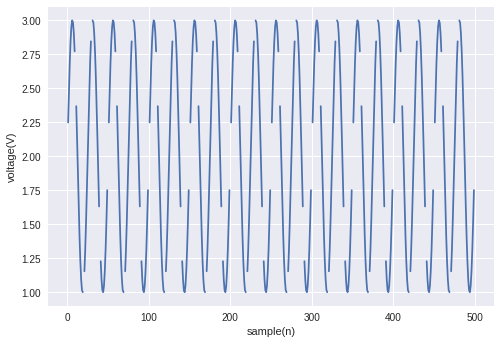

            x
0         NaN
1    2.248690
2    2.481754
3    2.684547
4    2.844328
5    2.951057
6    2.998027
7    2.982287
8    2.904827
9    2.770513
10        NaN
11   2.368125
12   2.125333
13   1.874667
14   1.631875
15   1.412215
16   1.229487
17   1.095173
18   1.017713
19   1.001973
20        NaN
21   1.155672
22   1.315453
23   1.518246
24   1.751310
25   2.000000
26   2.248690
27   2.481754
28   2.684547
29   2.844328
..        ...
470       NaN
471  1.155672
472  1.315453
473  1.518246
474  1.751310
475  2.000000
476  2.248690
477  2.481754
478  2.684547
479  2.844328
480       NaN
481  2.998027
482  2.982287
483  2.904827
484  2.770513
485  2.587785
486  2.368125
487  2.125333
488  1.874667
489  1.631875
490  1.412215
491  1.229487
492  1.095173
493  1.017713
494  1.001973
495  1.048943
496  1.155672
497  1.315453
498  1.518246
499  1.751310

[500 rows x 1 columns]
nums: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 22

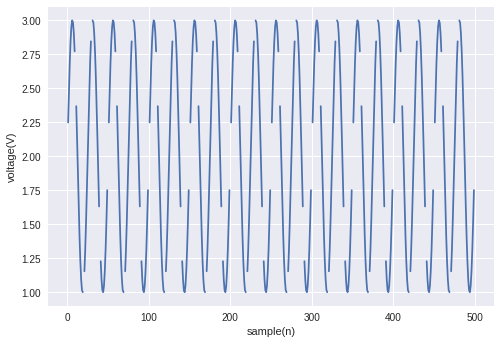

            x
0         NaN
1    2.248690
2    2.481754
3    2.684547
4    2.844328
5    2.951057
6    2.998027
7    2.982287
8    2.904827
9    2.770513
10        NaN
11   2.368125
12   2.125333
13   1.874667
14   1.631875
15   1.412215
16   1.229487
17   1.095173
18   1.017713
19   1.001973
20        NaN
21   1.155672
22   1.315453
23   1.518246
24   1.751310
25   2.000000
26   2.248690
27   2.481754
28   2.684547
29   2.844328
..        ...
470       NaN
471  1.155672
472  1.315453
473  1.518246
474  1.751310
475  2.000000
476  2.248690
477  2.481754
478  2.684547
479  2.844328
480       NaN
481  2.998027
482  2.982287
483  2.904827
484  2.770513
485  2.587785
486  2.368125
487  2.125333
488  1.874667
489  1.631875
490  1.412215
491  1.229487
492  1.095173
493  1.017713
494  1.001973
495  1.048943
496  1.155672
497  1.315453
498  1.518246
499  1.751310

[500 rows x 1 columns]


In [0]:
import matplotlib.pyplot as plt
import numpy as np


n_samples = 50

frequencies = [(3,2)]

resample_rates = [10,15]
substitute    = 0
length_validation_data = 12
length_of_forecast     = 6



rate = resample_rates[0]   

index = 0
Fs = 500 
f = 20.0 * 1
sample = 500
x = np.arange(sample)
y = pd.Series(np.sin(2 * np.pi * f * x / Fs)) + 2  
nums = [index for index in range(Fs - length_validation_data - length_of_forecast) if index % rate == 0]
print('nums:',nums)
y[nums] = None

plt.plot(x, y)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()
  
name = 'resampleGap-low-'+str(index+1).zfill(4)+ '.csv'  

file = pd.DataFrame(y,columns=['x'])

print(file)

file.to_csv('./samples/' + name, header=False)



rate = resample_rates[0]   

index = 0
Fs = 500 
f = 20.0 * 1
sample = 500
x = np.arange(sample)
y = pd.Series(np.sin(2 * np.pi * f * x / Fs)) + 2  
nums = [index for index in range(Fs -  length_validation_data - length_of_forecast) if index % rate == 0]
print('nums:',nums)
y[nums] = None

plt.plot(x, y)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()
  
name = 'resampleGap-high-'+str(index+1).zfill(4)+ '.csv'  

file = pd.DataFrame(y,columns=['x'])

print(file)

file.to_csv('./samples/' + name, header=False)
  


## Data Sampling Random

nums: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480]


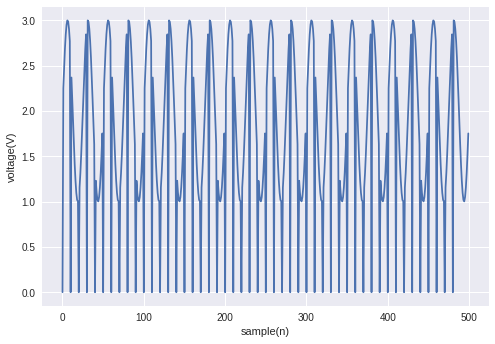

            x
0    0.000000
1    2.248690
2    2.481754
3    2.684547
4    2.844328
5    2.951057
6    2.998027
7    2.982287
8    2.904827
9    2.770513
10   0.000000
11   2.368125
12   2.125333
13   1.874667
14   1.631875
15   1.412215
16   1.229487
17   1.095173
18   1.017713
19   1.001973
20   0.000000
21   1.155672
22   1.315453
23   1.518246
24   1.751310
25   2.000000
26   2.248690
27   2.481754
28   2.684547
29   2.844328
..        ...
470  0.000000
471  1.155672
472  1.315453
473  1.518246
474  1.751310
475  2.000000
476  2.248690
477  2.481754
478  2.684547
479  2.844328
480  0.000000
481  2.998027
482  2.982287
483  2.904827
484  2.770513
485  2.587785
486  2.368125
487  2.125333
488  1.874667
489  1.631875
490  1.412215
491  1.229487
492  1.095173
493  1.017713
494  1.001973
495  1.048943
496  1.155672
497  1.315453
498  1.518246
499  1.751310

[500 rows x 1 columns]
nums: [473 401 186  16 173 412 103 426 205 395 180 281 368 374 100 273  90 257
 243  51 161 110  12 419  30 

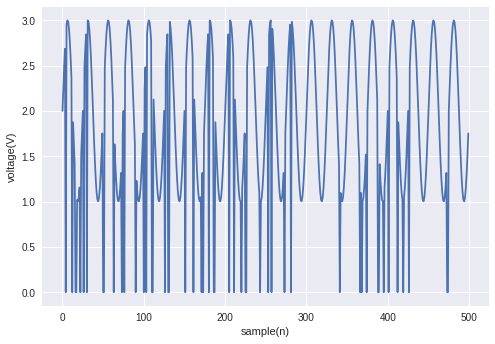

            x
0    2.000000
1    2.248690
2    2.481754
3    2.684547
4    0.000000
5    2.951057
6    2.998027
7    2.982287
8    2.904827
9    2.770513
10   2.587785
11   2.368125
12   0.000000
13   1.874667
14   1.631875
15   1.412215
16   0.000000
17   0.000000
18   1.017713
19   1.001973
20   1.048943
21   1.155672
22   0.000000
23   1.518246
24   1.751310
25   2.000000
26   0.000000
27   2.481754
28   2.684547
29   2.844328
..        ...
470  1.048943
471  1.155672
472  1.315453
473  0.000000
474  0.000000
475  2.000000
476  2.248690
477  2.481754
478  2.684547
479  2.844328
480  2.951057
481  2.998027
482  2.982287
483  2.904827
484  2.770513
485  2.587785
486  2.368125
487  2.125333
488  1.874667
489  1.631875
490  1.412215
491  1.229487
492  1.095173
493  1.017713
494  1.001973
495  1.048943
496  1.155672
497  1.315453
498  1.518246
499  1.751310

[500 rows x 1 columns]


In [0]:
import matplotlib.pyplot as plt
import numpy as np



index = 0
Fs = 500 
f = 20.0 * 1
sample = 500
n_samples = 50

frequencies = [(3,2)]

resample_rates = [10,15]
substitute    = 0

n_random_choice = int(Fs/resample_rates[0])


rate = resample_rates[0]   
x = np.arange(sample)
y = pd.Series(np.sin(2 * np.pi * f * x / Fs)) + 2  
nums = [index for index in range(Fs - length_validation_data - length_of_forecast) if index % rate == 0]
print('nums:',nums)
y[nums] = 0

plt.plot(x, y)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()
  
name = 'reRandom-low-'+str(index+1).zfill(4)+ '.csv'  

file = pd.DataFrame(y,columns=['x'])

print(file)
file.to_csv('./samples/' + name,header=False)



rate = resample_rates[0]   

index = 0
Fs = 500 
f = 20.0 * 1
sample = 500
x = np.arange(sample)
y = pd.Series(np.sin(2 * np.pi * f * x / Fs)) + 2  
nums = np.random.choice(range(Fs -  length_validation_data - length_of_forecast),n_random_choice, replace=False)
print('nums:',nums)
y[nums] = 0

plt.plot(x, y)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()
  
name = 'reRandom-high-'+str(index+1).zfill(4)+ '.csv'  

file = pd.DataFrame(y,columns=['x'])

print(file)
file.to_csv('./samples/' + name,header=False)

  
